B2B Courier Charges Accuracy Analysis using Python

Background Information

In today’s fast-paced e-commerce industry, fast and efficient order delivery is crucial to business success. To ensure seamless order fulfilment, businesses often partner with courier companies to ship their products to customers. However, managing the charges collected by these courier companies can be difficult, especially when dealing with a high volume of orders. It is one of the real-time problems B2B businesses experience when their estimated charges for the same invoice don’t match. In this project we will analyse a B2B Courier Charges Accuracy using Python.

B2B courier charges accuracy analysis focuses on assessing the accuracy of fees charged by courier companies for the delivery of goods in B2B transactions. The aim is to ensure that companies are billed appropriately for the services provided by courier companies.

==================================================================================================================

Data Description

ABC has internal data split across three reports: Website Order Report, Master SKU, and Warehouse PIN for all India Pincode mappings.

The website order report includes order IDs and products (SKUs) for each order. The SKU master provides the gross weight of each product, which is needed to calculate the total weight of each order


From the courier company we have the billing data and the invoice data. 
The Courier company invoice data contain information such as AWB number, order ID, shipment weight, warehouse pickup PIN, customer delivery PIN, delivery area, the charge per shipment and type of shipment.

  

======================================================================================================================

Aim
    
To check if the fees charged by the courier company for each order are correct by comparing the total weight of each order calculated using the SKU master with the weight stated by the courier company in their invoice and calculating charges based on the slab weight, delivery area and type of shipment listed on the courier company’s invoice.
         

===============================================================================================================

Instructions:

* Import all the necessary libraries for your project

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  *Load and View all the datasets concerning the case study

In [69]:

courier_rates = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/B2B Courier Charges/Courier Company - Rates.csv')
order_invoices = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/B2B Courier Charges/Invoice.csv')
order_reports = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/B2B Courier Charges/Order Report.csv')
master_SKU = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/B2B Courier Charges/SKU Master.csv')
order_pincodes = pd.read_csv('C:/Users/Sicelo/Documents/Python Data Analysis/Ongoing Projects/B2B Courier Charges/pincodes.csv')


In [70]:
#Now lets view our dataframes

print("Courier Rates: ")
print(courier_rates.head())

Courier Rates: 
   fwd_a_fixed  fwd_a_additional  fwd_b_fixed  fwd_b_additional  fwd_c_fixed  \
0         29.5              23.6           33              28.3         40.1   

   fwd_c_additional  fwd_d_fixed  fwd_d_additional  fwd_e_fixed  \
0              38.9         45.4              44.8         56.6   

   fwd_e_additional  rto_a_fixed  rto_a_additional  rto_b_fixed  \
0              55.5         13.6              23.6         20.5   

   rto_b_additional  rto_c_fixed  rto_c_additional  rto_d_fixed  \
0              28.3         31.9              38.9         41.3   

   rto_d_additional  rto_e_fixed  rto_e_additional  
0              44.8         50.7              55.5  


In [71]:
print("Order Invoices : ")
order_invoices.head()

Order Invoices : 


,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [72]:
print("Order Reports:  ")
order_reports.head()

Order Reports:  


,ExternOrderNo,SKU,Order Qty,Unnamed: 3,Unnamed: 4
0,2001827036,8904223818706,1.0,NaN,NaN
1,2001827036,8904223819093,1.0,NaN,NaN
2,2001827036,8904223819109,1.0,NaN,NaN
3,2001827036,8904223818430,1.0,NaN,NaN
4,2001827036,8904223819277,1.0,NaN,NaN


In [73]:
print("Master SKU:  ")
master_SKU.head()

Master SKU:  


,SKU,Weight (g),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,8904223815682,210,NaN,NaN,NaN
1,8904223815859,165,NaN,NaN,NaN
2,8904223815866,113,NaN,NaN,NaN
3,8904223815873,65,NaN,NaN,NaN
4,8904223816214,120,NaN,NaN,NaN


In [74]:
print("Pincodes: ")
order_pincodes.head()

Pincodes: 


,Warehouse Pincode,Customer Pincode,Zone,Unnamed: 3,Unnamed: 4
0,121003,507101,d,NaN,NaN
1,121003,486886,d,NaN,NaN
2,121003,532484,d,NaN,NaN
3,121003,143001,b,NaN,NaN
4,121003,515591,d,NaN,NaN


Are there any missing values in your dataframes?

In [75]:
print("Checking for some missing values in our dataframes:  ")

print()


print(courier_rates.isnull().sum())
print("-------------------------------------")
print(order_invoices.isnull().sum())
print("--------------------------------------")
print(order_reports.isnull().sum())
print("---------------------------------------")
print(order_pincodes.isnull().sum())
print("---------------------------------------")
print(master_SKU.isnull().sum())



Checking for some missing values in our dataframes:  

fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional    0
rto_e_fixed         0
rto_e_additional    0
dtype: int64
-------------------------------------
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64
--------------------------------------
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64
---------------------------------------
Warehouse Pincode      0
Customer Pi

Based on the above it is clear that we do not have any missing values from our valid dataframes columns except in the unnamed columns.

============================================================================================================

Now perform some data cleaning in your data

I. Remove unnamed columns from the Website Order Report, SKU Master and Pincode Mapping DataFrame

II. After performing those operations, view the dataframes again

In [76]:

order_reports = order_reports.drop(columns = ['Unnamed: 3','Unnamed: 4' ])
master_SKU = master_SKU.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
order_pincodes = order_pincodes.drop(columns = ['Unnamed: 3', 'Unnamed: 4'])


In [77]:
print("New order reports dataframe: ")
order_reports.head()

New order reports dataframe: 


,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [78]:
print("New Master SKU dataframe:  ")
master_SKU.head()

New Master SKU dataframe:  


,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [79]:
print("New Order Pincodes dataframe: ")
order_pincodes.head()

New Order Pincodes dataframe: 


,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


============================================================================================

To ensure that our data becomes so useful, we’ll have to wrangle some data columns

I. Merge the order report and SKU master datasets according to the common SKU column

In [80]:
#To merge the dataframes, they both must have a common appearing column, in this case the 'SKU 'column
#One interesting question before applying the merge function is to how do we find the common columns from dataframes?
#example: method 1:  np.intersect1d(df2.columns, df1.columns)....numpy method, df2.columns.intersection(df1.columns)..pandas method

merged_data = pd.merge(order_reports, master_SKU, on = 'SKU')
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


II. ‘ExternOrderNo’ is nothing but ‘Order Id’ in other datasets. Rename this column to ‘Order ID’.

In [81]:
merged_data = merged_data.rename(columns = {'ExternOrderNo': 'Order ID'})
merged_data.head()


,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


III. Merge the courier invoice and pincode mapping dataset, to do this firstly create a unique customer pin codes from the pincode mapping dataset and create a new DataFrame called “abc_courier” to store this information and continue from there.

In [82]:
abc_courier = order_pincodes.drop_duplicates(subset = "Customer Pincode") #remember that the pincodes come from the ABC Company
                                                                          #subset ensures that we drop columns based on 'Customer Pincode' column
new_order_invoices = order_invoices[["Order ID", "Customer Pincode", "Type of Shipment", "Billing Amount (Rs.)"]]

pincodes = pd.merge(abc_courier, new_order_invoices, on = "Customer Pincode")

pincodes.head()



,Warehouse Pincode,Customer Pincode,Zone,Order ID,Type of Shipment,Billing Amount (Rs.)
0,121003,507101,d,2001806232,Forward charges,135.0
1,121003,486886,d,2001806273,Forward charges,90.2
2,121003,532484,d,2001806408,Forward charges,224.6
3,121003,143001,b,2001806458,Forward charges,61.3
4,121003,515591,d,2001807012,Forward charges,45.4


IV.	 Now  merge the pin codes with the main dataframe

In [83]:
#looking at these two dataframes we observe that the common column on both dataframes is the 'Order ID'
#Hence we will merge the two dataframes using that column 

new_merged_data = pd.merge(pincodes, merged_data, on = "Order ID")
new_merged_data.head()


,Warehouse Pincode,Customer Pincode,Zone,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g)
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133


V.	Now let’s calculate the weight in kilograms by dividing the ‘Weight (g)’ column in the ‘merged2’ DataFrame by 1000

In [84]:
new_merged_data["Weight (kg)"] = new_merged_data["Weight (g)"]/1000

new_merged_data.head()

,Warehouse Pincode,Customer Pincode,Zone,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g),Weight (kg)
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240,0.240
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137,0.137
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127,0.127
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240,0.240
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133,0.133


In [85]:
#Alternatively we can create a function and then apply the 'apply()' function

def kilogrames(x):
    value = x/1000
    return value

new_merged_data["Weight (kg)"] = new_merged_data["Weight (g)"].apply(kilogrames)
new_merged_data


,Warehouse Pincode,Customer Pincode,Zone,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g),Weight (kg)
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240,0.240
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137,0.137
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127,0.127
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240,0.240
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133,0.133
...,...,...,...,...,...,...,...,...,...,...
396,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818706,1.0,127,0.127
397,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223819468,1.0,240,0.240
398,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818850,1.0,240,0.240
399,121003,313301,b,2001820978,Forward charges,45.4,8904223815859,1.0,165,0.165


VI. Now let’s calculate the weight slabs and create a new column named 'Weight Slab (KG)' from the merged dataframe

In [86]:
#we are required to convert the weight to the nearest multiple of 0.5
#So in order to do this we will have to look at the decimal values 

def weight_slab(weight):
    
    decimal = round(weight%1, 1)
    
    if decimal == 0.0:       #int(weight) ensures that we ignore the decimals
                             #if the remainder decimal is 0, then return weight as it is, nothing to rounding off
        return int(weight)
    elif decimal > 0.5:        #if the remainder decimal is greater than 0.5 then the nearest multiple of 0.5 is 1
        return int(weight)+1
    else:
        return int(weight) + 0.5  #if the remainder decimal is less than 0.5 then the nearest multiple of 0.5 is 0.5
    
new_merged_data['Weight Slab (KG)'] = new_merged_data['Weight (kg)'].apply(weight_slab)

new_merged_data
    


,Warehouse Pincode,Customer Pincode,Zone,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g),Weight (kg),Weight Slab (KG)
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240,0.240,0.5
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137,0.137,0.5
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127,0.127,0.5
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240,0.240,0.5
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133,0.133,0.5
...,...,...,...,...,...,...,...,...,...,...,...
396,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818706,1.0,127,0.127,0.5
397,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223819468,1.0,240,0.240,0.5
398,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818850,1.0,240,0.240,0.5
399,121003,313301,b,2001820978,Forward charges,45.4,8904223815859,1.0,165,0.165,0.5


Rename the columns to prepare for the desired dataframe

In [87]:

order_invoices = order_invoices.rename(columns = {"Zone": "Delivery Zone Charged by Courier Company"})
new_merged_data = new_merged_data.rename(columns = {"Zone": "Delivery Zone as per ABC"})
new_merged_data = new_merged_data.rename(columns = {"Weight Slab (KG)" : "Weight Slab As Per ABC"})



In [88]:
new_merged_data

,Warehouse Pincode,Customer Pincode,Delivery Zone as per ABC,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g),Weight (kg),Weight Slab As Per ABC
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240,0.240,0.5
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137,0.137,0.5
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127,0.127,0.5
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240,0.240,0.5
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133,0.133,0.5
...,...,...,...,...,...,...,...,...,...,...,...
396,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818706,1.0,127,0.127,0.5
397,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223819468,1.0,240,0.240,0.5
398,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818850,1.0,240,0.240,0.5
399,121003,313301,b,2001820978,Forward charges,45.4,8904223815859,1.0,165,0.165,0.5


Calculate the expected charges and use your calculations to prepare a column 'Expected Charge as per ABC' as described in the case study.
Hint! Store your values in a list

In [89]:
np.unique(new_merged_data['Delivery Zone as per ABC'].values)

array(['b', 'd', 'e'], dtype=object)

In [90]:
for i, row in  new_merged_data.iterrows():
    print(row)
    
#The iterrows() method goes throught/ iterates through each andevery row value while also considering that column value

Warehouse Pincode                    121003
Customer Pincode                     507101
Delivery Zone as per ABC                  d
Order ID                         2001806232
Type of Shipment            Forward charges
Billing Amount (Rs.)                  135.0
SKU                           8904223819147
Order Qty                               2.0
Weight (g)                              240
Weight (kg)                            0.24
Weight Slab As Per ABC                  0.5
Name: 0, dtype: object
Warehouse Pincode                    121003
Customer Pincode                     507101
Delivery Zone as per ABC                  d
Order ID                         2001806232
Type of Shipment            Forward charges
Billing Amount (Rs.)                  135.0
SKU                           8904223818645
Order Qty                               6.0
Weight (g)                              137
Weight (kg)                           0.137
Weight Slab As Per ABC                  0.5
Name: 1, 

In [91]:
#To do this we will have to use our newly created merged dataframe

total_expected_charge = []

for _,row in new_merged_data.iterrows():
    
    #Please note that each Delivery Zone has its own fixed fee charge
    fwd_category = 'fwd_' + row['Delivery Zone as per ABC']
    fwd_fixed_charge = courier_rates.at[0, fwd_category + '_fixed']
    fwd_additional_charge = courier_rates.at[0, fwd_category + '_additional']
    
    rto_category = 'rto_' + row['Delivery Zone as per ABC']
    rto_fixed_charge = courier_rates.at[0, rto_category + '_fixed']
    rto_additional_charge = courier_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight_charge = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed_charge + additional_weight_charge * fwd_additional_charge)
        
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight_charge = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed_charge + additional_weight_charge * (fwd_additional_charge + rto_additional_charge))
        
    else:
        total_expected_charge.append(0)

new_merged_data['Expected Charge as per ABC'] = total_expected_charge


new_merged_data

,Warehouse Pincode,Customer Pincode,Delivery Zone as per ABC,Order ID,Type of Shipment,Billing Amount (Rs.),SKU,Order Qty,Weight (g),Weight (kg),Weight Slab As Per ABC,Expected Charge as per ABC
0,121003,507101,d,2001806232,Forward charges,135.0,8904223819147,2.0,240,0.240,0.5,45.4
1,121003,507101,d,2001806232,Forward charges,135.0,8904223818645,6.0,137,0.137,0.5,45.4
2,121003,486886,d,2001806273,Forward charges,90.2,8904223818706,1.0,127,0.127,0.5,45.4
3,121003,486886,d,2001806273,Forward charges,90.2,8904223818850,1.0,240,0.240,0.5,45.4
4,121003,486886,d,2001806273,Forward charges,90.2,8904223818942,1.0,133,0.133,0.5,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...
396,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818706,1.0,127,0.127,0.5,33.0
397,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223819468,1.0,240,0.240,0.5,33.0
398,121003,303702,b,2001809383,Forward and RTO charges,86.7,8904223818850,1.0,240,0.240,0.5,33.0
399,121003,313301,b,2001820978,Forward charges,45.4,8904223815859,1.0,165,0.165,0.5,33.0


IX. Now merge this dataframe with courier invoice according to the Order Id column to display the final dataframe

In [92]:
new_data = pd.merge(order_invoices, new_merged_data, on = "Order ID")
new_data.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode_x,Customer Pincode_x,Delivery Zone Charged by Courier Company,Type of Shipment_x,Billing Amount (Rs.)_x,Warehouse Pincode_y,Customer Pincode_y,Delivery Zone as per ABC,Type of Shipment_y,Billing Amount (Rs.)_y,SKU,Order Qty,Weight (g),Weight (kg),Weight Slab As Per ABC,Expected Charge as per ABC
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0,121003,507101,d,Forward charges,135.0,8904223819147,2.0,240,0.240,0.5,45.4
1,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0,121003,507101,d,Forward charges,135.0,8904223818645,6.0,137,0.137,0.5,45.4
2,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818706,1.0,127,0.127,0.5,45.4
3,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818850,1.0,240,0.240,0.5,45.4
4,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818942,1.0,133,0.133,0.5,45.4


Calculations

I. Calculate the differences in charges and expected charges for each order:

In [93]:
difference_data = new_data

difference_data["Difference in Charges"] = difference_data["Billing Amount (Rs.)_x"]-difference_data["Expected Charge as per ABC"]

difference_data.head(10)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode_x,Customer Pincode_x,Delivery Zone Charged by Courier Company,Type of Shipment_x,Billing Amount (Rs.)_x,Warehouse Pincode_y,Customer Pincode_y,Delivery Zone as per ABC,Type of Shipment_y,Billing Amount (Rs.)_y,SKU,Order Qty,Weight (g),Weight (kg),Weight Slab As Per ABC,Expected Charge as per ABC,Difference in Charges
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0,121003,507101,d,Forward charges,135.0,8904223819147,2.0,240,0.240,0.5,45.4,89.6
1,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0,121003,507101,d,Forward charges,135.0,8904223818645,6.0,137,0.137,0.5,45.4,89.6
2,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818706,1.0,127,0.127,0.5,45.4,44.8
3,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818850,1.0,240,0.240,0.5,45.4,44.8
4,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223818942,1.0,133,0.133,0.5,45.4,44.8
5,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2,121003,486886,d,Forward charges,90.2,8904223819017,1.0,115,0.115,0.5,45.4,44.8
6,1091117222931,2001806408,2.5,121003,532484,d,Forward charges,224.6,121003,532484,d,Forward charges,224.6,8904223819024,8.0,112,0.112,0.5,45.4,179.2
7,1091117222931,2001806408,2.5,121003,532484,d,Forward charges,224.6,121003,532484,d,Forward charges,224.6,8904223818874,1.0,100,0.100,0.5,45.4,179.2
8,1091117222931,2001806408,2.5,121003,532484,d,Forward charges,224.6,121003,532484,d,Forward charges,224.6,8904223819352,1.0,165,0.165,0.5,45.4,179.2
9,1091117222931,2001806408,2.5,121003,532484,d,Forward charges,224.6,121003,532484,d,Forward charges,224.6,8904223819437,2.0,552,0.552,1.0,90.2,134.4


II.	Summarize the accuracy of B2B courier charges based on the charged prices and expected prices. 

To do this calculate the  ;

a)	Total orders in each category i.e. ‘overcharged, correctly charged and undercharged.

b)	Total amount in each category

c)	And then proceed


In [94]:
#The total orders in each category 

overchaged_orders = len(difference_data[  difference_data["Difference in Charges"]> 0  ])
print(overchaged_orders)

undercharged_orders = len(difference_data[ difference_data["Difference in Charges"]< 0 ])
print(undercharged_orders)

correctly_charged = len(difference_data[  difference_data["Difference in Charges"] == 0])
print(correctly_charged)

382
7
12


In [95]:
#The total amount in each category

overcharged_df = difference_data[  difference_data["Difference in Charges"]> 0  ]
overcharged_amount = overcharged_df["Difference in Charges"].values.sum()
overcharged_amount


33750.5

In [96]:
undercharged_df = difference_data[  difference_data["Difference in Charges"]< 0  ]
undercharged_amount = undercharged_df["Difference in Charges"].values.sum()
undercharged_amount

-165.2

In [97]:
correct_df = difference_data[  difference_data["Difference in Charges"] == 0]
correctlycharged_amount = correct_df["Expected Charge as per ABC"].values.sum()
round(correctlycharged_amount, 1)

#We can either calculate this amount calculating the amount charged by ABC company or the billing amount from the courier company

507.6

In [98]:

summary_df = pd.DataFrame({" Description ":["Total Orders where ABC has been correctly charged",
                                           "Total Orders where ABC has been overcharged",
                                           "Total Orders where ABC has been undercharged"],
                           "Count":[correctly_charged,overchaged_orders, undercharged_orders],
                          "Amount (Rs.)":[correctlycharged_amount, overcharged_amount, undercharged_amount ]})

summary_df

,Description,Count,Amount (Rs.)
0,Total Orders where ABC has been correctly charged,12,507.6
1,Total Orders where ABC has been overcharged,382,33750.5
2,Total Orders where ABC has been undercharged,7,-165.2


•	Draw a pie plot to visualize the proportion of errors made by the courier company

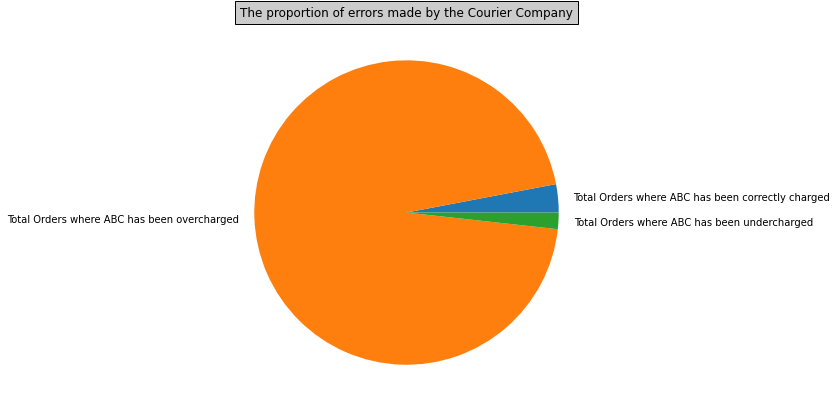

In [121]:
plt.figure(figsize = (12, 7))

labels = summary_df[" Description "]

plt.pie( data = summary_df, x =summary_df['Count'] , labels = labels,   startangle = 0)

plt.title("The proportion of errors made by the Courier Company", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

#plt.legend the legend in this case is inserted inside the plot, avoid using it in such instances

plt.show()



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

•	Conclusions and some recommendations

On most orders the ABC Company was overcharged by the courier company.
Hence most of the fees charged by the courier company for each order were not correct.

The ABC Company must evaluate the required payments before they pay the bill.

The courier company must not calculate orders incorrectly. Processing courier payments incorrectly is regarded as a financial crime which may disturb the business relationship they have with the ABC Company.